# Модуль 6 Spark, PySpark

##Завдання 1
У цьому завданні вам потрібно завантажити [цей датасет](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019/download). Ми з вами вже працювали з ним коли вивчали pandas. Це все так само Топ-50 книг, що найбільше продаються на Amazon в період з 2009 по 2019 роки. Потрібно виконати таке:

Створити спарк сесію.

Прочитати датасет до датафрейму.

Використовуючи тільки RDD обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7

Побудувати гістограму розподілу рецензій (стовпець Reviews).

Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".

Використовуючи бібліотеку seaborn побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".

In [ ]:
!pip install pyspark

In [22]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkFiles
import matplotlib.pyplot as plt 
import seaborn as sns
from pyspark.sql.functions import mean

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
"""Завантаження по URL не працює"""
url = 'https://drive.google.com/u/0/uc?id=1_mzO_nvnFn3CnTynoUyLxO0Xe9IdwhUb&export=download'
url_2 = 'https://raw.githubusercontent.com/vlad-bb/Python-Data-Science/main/modul_06/bestsellers.csv'
spark.sparkContext.addFile(url_2)
df = spark.read.option("sep", ",").csv("file://" + SparkFiles.get("bestsellers.csv"),header=True, inferSchema=True)

In [5]:
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

Використовуючи тільки RDD обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7

In [7]:
df.filter(df['User Rating'] > 4.7).agg({'Price': 'avg'}).show()

+-----------------+
|       avg(Price)|
+-----------------+
|10.69832402234637|
+-----------------+



Побудувати гістограму розподілу рецензій (стовпець Reviews).

In [12]:
df_reviews = df['User Rating', 'Reviews'].toPandas()

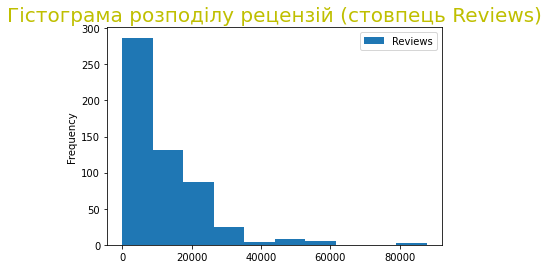

In [14]:
df_reviews.plot.hist(y='Reviews', x='User Rating')
plt.title('Гістограма розподілу рецензій (стовпець Reviews)', fontsize=20, color='y')
plt.show()

Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".

In [25]:
matrix = df["User Rating", "Reviews", "Price"].toPandas()
correlation = matrix.corr()
correlation

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


Використовуючи бібліотеку seaborn побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".

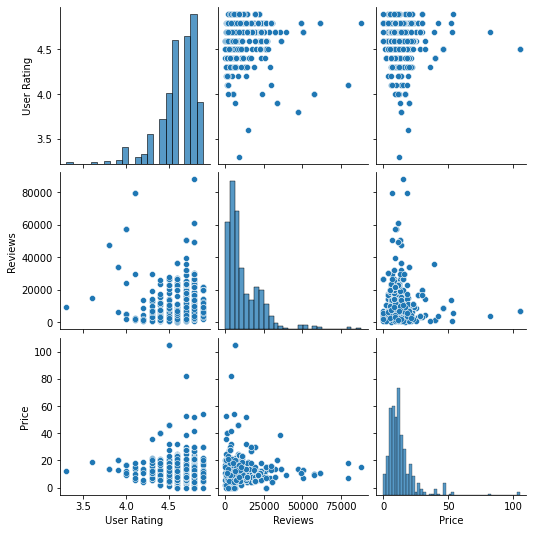

In [34]:
sns.pairplot(matrix, diag_kind="hist");

#Завдання 2
Під час виконання цього завдання можна використовувати лише Spark SQL. 

Для датасету з попереднього завдання виконайте таке:

Знайдіть автора із найвищим рейтингом.

Знайдіть трьох авторів із найнижчим рейтингом.

Визначте, який автор отримав найбільшу кількість рецензій.

Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.

Визначте, яка книга жанру "Fiction" має найменший рейтинг.

Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.

In [85]:
df_books = df
new_names = ['name', 'author', 'rating', 'reviews', 'price', 'year', 'genre']
for c,n in zip(df_books.columns, new_names):
    df_books = df_books.withColumnRenamed(c,n)
df_books.createOrReplaceTempView("books")

In [68]:
spark.sql("SELECT DISTINCT author, rating FROM books WHERE rating == (SELECT MAX(rating) FROM books)").show()

+--------------------+------+
|              author|rating|
+--------------------+------+
|Emily Winfield Ma...|   4.9|
|     Bill Martin Jr.|   4.9|
|          Eric Carle|   4.9|
|          Pete Souza|   4.9|
|      Nathan W. Pyle|   4.9|
|         Jeff Kinney|   4.9|
|     Brandon Stanton|   4.9|
|        J.K. Rowling|   4.9|
|         Chip Gaines|   4.9|
|           Dr. Seuss|   4.9|
|      Alice Schertle|   4.9|
|       Rush Limbaugh|   4.9|
|          Dav Pilkey|   4.9|
|       J. K. Rowling|   4.9|
|      Patrick Thorpe|   4.9|
|       Mark R. Levin|   4.9|
|Sherri Duskey Rinker|   4.9|
|          Jill Twiss|   4.9|
|         Sarah Young|   4.9|
|  Lin-Manuel Miranda|   4.9|
+--------------------+------+



Знайдіть трьох авторів із найнижчим рейтингом.

In [72]:
spark.sql("SELECT DISTINCT author, rating FROM books ORDER BY rating LIMIT 3").show()

+------------+------+
|      author|rating|
+------------+------+
|J.K. Rowling|   3.3|
|  Harper Lee|   3.6|
|   E L James|   3.8|
+------------+------+



Визначте, який автор отримав найбільшу кількість рецензій.

In [74]:
spark.sql("SELECT DISTINCT author, reviews FROM books ORDER BY reviews DESC LIMIT 1").show()

+-----------+-------+
|     author|reviews|
+-----------+-------+
|Delia Owens|  87841|
+-----------+-------+



Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.

In [76]:
spark.sql("SELECT author, toms FROM (SELECT author, COUNT(author) as toms FROM books GROUP BY author) ORDER BY toms DESC LIMIT 1").show()

+-----------+----+
|     author|toms|
+-----------+----+
|Jeff Kinney|  12|
+-----------+----+



Визначте, яка книга жанру "Fiction" має найменший рейтинг.

In [77]:

spark.sql("SELECT name, genre, rating FROM books WHERE genre == 'Fiction' ORDER BY rating LIMIT 1").show()

+------------------+-------+------+
|              name|  genre|rating|
+------------------+-------+------+
|The Casual Vacancy|Fiction|   3.3|
+------------------+-------+------+



Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.

In [78]:
spark.sql("SELECT name, genre, rating FROM books WHERE genre == 'Non Fiction' ORDER BY rating DESC LIMIT 1").show()

+--------------------+-----------+------+
|                name|      genre|rating|
+--------------------+-----------+------+
|Hamilton: The Rev...|Non Fiction|   4.9|
+--------------------+-----------+------+



#Завдання 3
Побудуйте гістограму середньої кількості рецензій за роками. 



In [86]:
df_gist = df_books.groupBy('year').agg({'reviews': 'avg'}).toPandas()

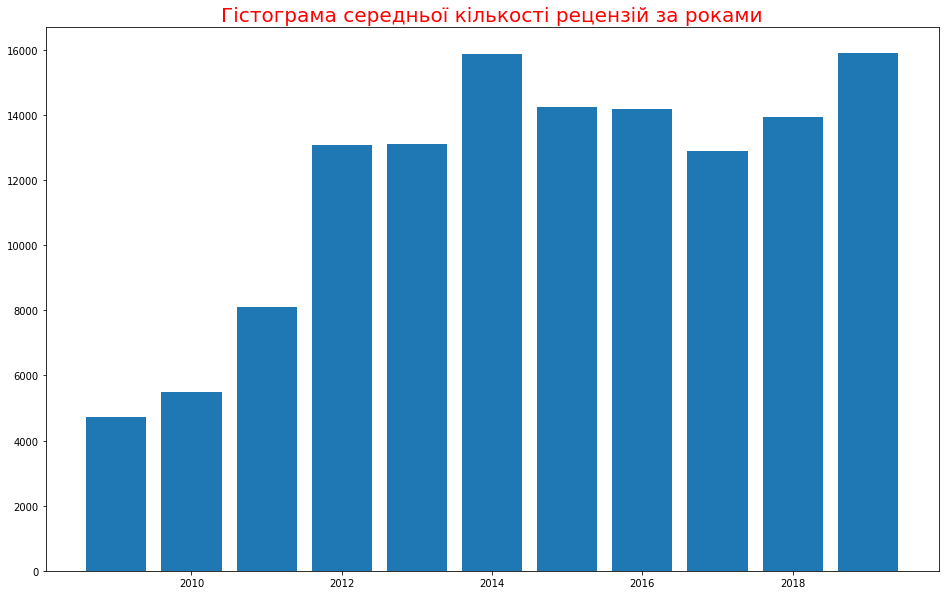

In [87]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.bar(df_gist['year'], df_gist['avg(reviews)'])
plt.title('Гістограма середньої кількості рецензій за роками', fontsize=20, color='r')
plt.show()

У вигляді окремої гістограми візуалізуйте кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період.

In [88]:
df_visual = df_books.groupby(["year", "genre"]).count().toPandas()

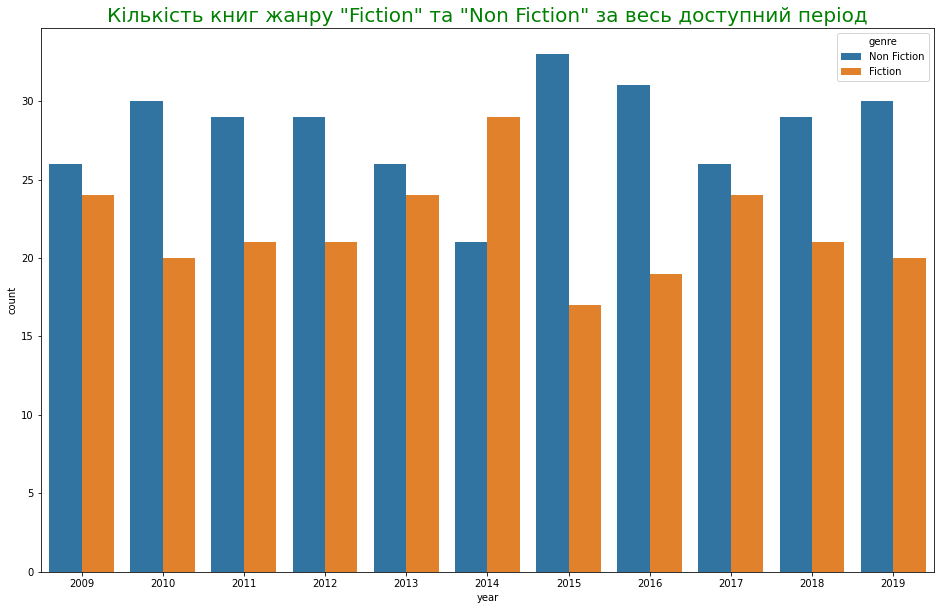

In [89]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.barplot(x="year", y="count", hue="genre", data=df_visual)
plt.title('Кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період', fontsize=20, color='g')
plt.show()